In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
BMAX=9250
BLIM_LO = 0.15*BMAX
BLIM_HI = 0.95*BMAX
ENP_MARGIN = 3000
BSAFE_LO = 0.35*BMAX
BSAFE_HI = 0.65*BMAX
BOPT = 0.5*BMAX
ENP_MARGIN = 0.3*BMAX
enp_limit = ENP_MARGIN/2 


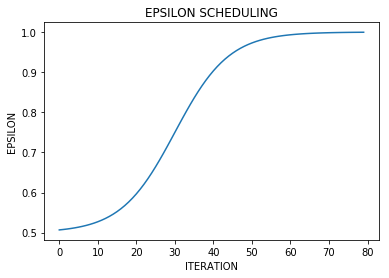

In [64]:
e_rec = []
slope=7
start = 0.5
inflection_point = 30 #EPSILON = start*(1 + 1/(1+1)) = 0.75 @ iteration=inflection_point
for iteration in np.arange(0,80):
    e = start + start/(1 + np.exp(-(iteration-inflection_point)/slope))
    e_rec= np.append(e_rec,e)

plt.title("EPSILON SCHEDULING")
plt.xlabel("ITERATION")
plt.ylabel("EPSILON")
plt.plot(e_rec)

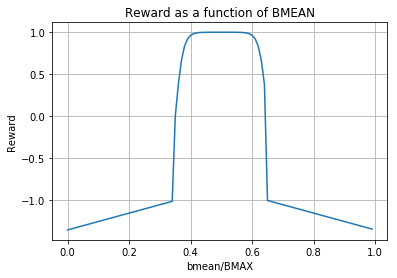

In [74]:
def r1(bmean): 
    bdev = np.abs(BOPT - bmean)
    # bdev ranges from bdev = (0,0.5) of BMAX
    # based on the sigmoid function
    r = 0
    sharpness = 80
    if(bdev<ENP_MARGIN/2) : 
        r += 1 - 2/ (1 + np.exp(-sharpness*(bdev - ENP_MARGIN/2)/BMAX))
    else: 
        r= -1 -1*(bdev-ENP_MARGIN/2)/BMAX
    return r

x = np.arange(0,1,1E-2)
y = [r1(i*BMAX) for i in x]
plt.title('Reward as a function of BMEAN')
plt.plot(x,y)
plt.xlabel('bmean/BMAX')
plt.ylabel('Reward')
plt.grid(True)

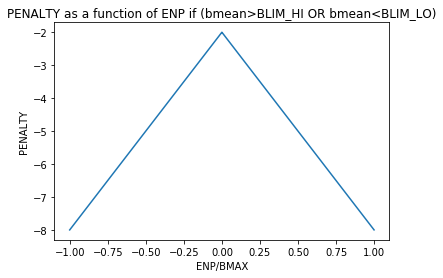

In [66]:
enp = np.arange(-9250,9250,1)
penalty = -2 - 6*np.abs(enp)/BMAX
plt.title("PENALTY as a function of ENP if (bmean>BLIM_HI OR bmean<BLIM_LO)")
plt.xlabel("ENP/BMAX")
plt.ylabel("PENALTY")
plt.plot(enp/BMAX,penalty);

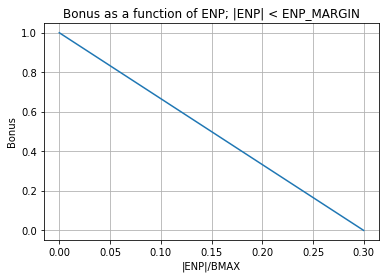

In [6]:
def r2(enp): 
    r = 1-(10/3)*(enp)/BMAX
    return r

x = np.arange(0,0.3*9250)
y = [r2(i) for i in x]
plt.title('Bonus as a function of ENP; |ENP| < ENP_MARGIN')
plt.plot(x/9250,y)
plt.xlabel('|ENP|/BMAX')
plt.ylabel('Bonus')
plt.grid(True)

In [109]:
def rwdfn(bmean,enp):
    reward = 0
    bdev = np.abs(BOPT - bmean)

    if (bmean<BLIM_LO and enp < 0 ): #if battery is outside critical limits
        reward += -4 - 6*(-enp/BMAX)*2*(bdev/BMAX)
    
    elif (bmean>BLIM_HI and enp > 0): #if battery is outside critical limits
        reward += -4 - 6*(enp/BMAX)*2*(bdev/BMAX)

    else: #if battery is within critical limits
#         based on the sigmoid function
        sharpness = 80
        if(bdev<ENP_MARGIN/2): 
            r = 1 - 2/ (1 + np.exp(-sharpness*(bdev - ENP_MARGIN/2)/BMAX))
        else: 
            r= -1 - 10*(bdev-ENP_MARGIN/2)/BMAX
        reward += r

        if (bmean>BSAFE_LO and bmean<BSAFE_HI and np.abs(enp)<=ENP_MARGIN): #if enp is within limits
            bonus = 1-(10/3)*np.abs(enp)/BMAX
            reward = reward*3**bonus
        else:
            reward = reward
    return reward

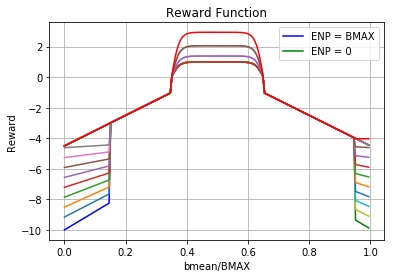

In [112]:
bmean = np.arange(0,BMAX,50)
enp = np.arange(-BMAX,BMAX,100)
y_rec = np.empty((bmean.size,enp.size))

for i in np.arange(bmean.size):
    for j in np.arange(enp.size):
        y_rec[i,j] = rwdfn(bmean[i],enp[j])
x = bmean/BMAX
plt.plot(x,y_rec[:,0], color = 'b')
plt.plot(x,y_rec[:,-1],color = 'g')
plt.plot(x,y_rec[:,13])
plt.plot(x,y_rec[:,23])
plt.plot(x,y_rec[:,33])
plt.plot(x,y_rec[:,43])
plt.plot(x,y_rec[:,53])
plt.plot(x,y_rec[:,63])
plt.plot(x,y_rec[:,73])
plt.plot(x,y_rec[:,83])
plt.plot(x,y_rec[:,-13])
plt.plot(x,y_rec[:,-23])
plt.plot(x,y_rec[:,-33])
plt.plot(x,y_rec[:,-43])
plt.plot(x,y_rec[:,-53])
plt.plot(x,y_rec[:,-63])
plt.plot(x,y_rec[:,-73])
plt.plot(x,y_rec[:,-83])
plt.plot(x,y_rec[:,93],color = 'r')
plt.title('Reward Function')
plt.xlabel('bmean/BMAX')
plt.ylabel('Reward')
plt.grid(True)
plt.legend(['ENP = BMAX','ENP = 0'])